## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mousecount = len(mousestudy_df['Mouse ID'].unique())
mousecount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = mousestudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mousecount = len(clean_df['Mouse ID'].unique())
mousecount

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#sort by drug regimen
tumor_drug_df = clean_df.groupby(["Drug Regimen"])
tumor_drug_df

#calculate mean
tumor_mean = tumor_drug_df['Tumor Volume (mm3)'].mean()
tumor_mean

#calculate median
tumor_median = tumor_drug_df['Tumor Volume (mm3)'].median()
tumor_median

#calculate varience
tumor_variance = tumor_drug_df['Tumor Volume (mm3)'].var()
tumor_variance

#calculate standard deviation
tumor_std = tumor_drug_df['Tumor Volume (mm3)'].std()
tumor_std

#calculate SEM
tumor_sem = tumor_drug_df['Tumor Volume (mm3)'].sem()
tumor_sem

# Assemble the resulting series into a single summary dataframe.
drug_tumor_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                    "Median": tumor_median,
                                    "Variance": tumor_variance,
                                    "Standard Deviation": tumor_std,
                                    "SEM": tumor_sem
                                   })
drug_tumor_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#tumor_drug_df.agg(({"Mean": [tumor_mean], "Median": [tumor_median], "Variance": [tumor_variance], "Standard Deviation": [tumor_std], "SEM": [tumor_sem]})

## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#sort the df by drug
drug_df = clean_df.groupby(["Drug Regimen"])
drug_df.head()
#make a count for each of the mice within the drug regimen
mousecount = drug_df['Mouse ID'].count()
mousecount
#assemble df
drug_df = pd.DataFrame({"Mouse Count": mousecount})
drug_df

,Mouse Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


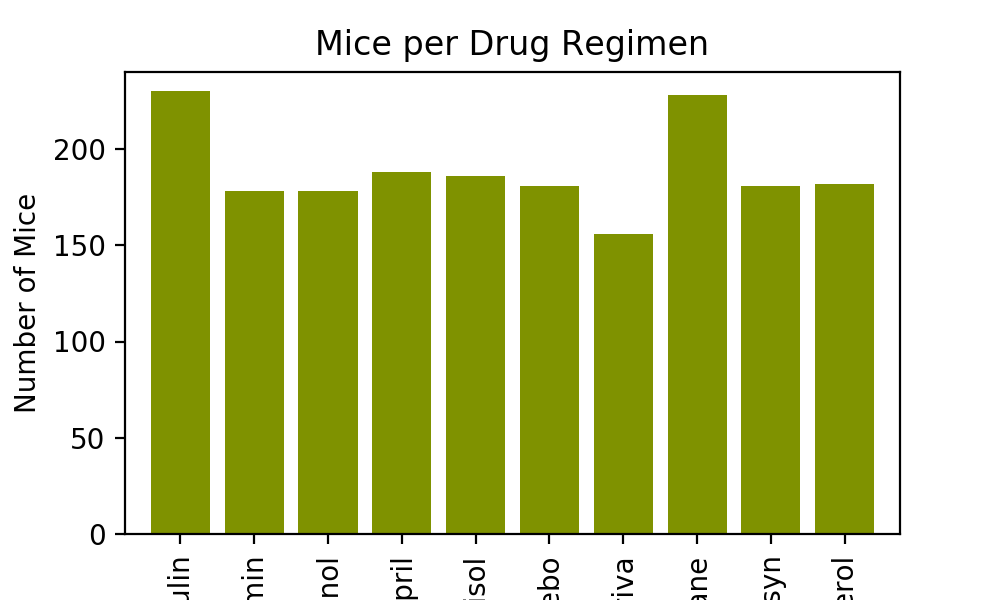

In [30]:
x_axis = np.arange(len(drug_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, mousecount, color='orange', alpha=0.5, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Porpriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mousecount)+10)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Porpriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(drugs))

plt.bar(x_axis, mousecount, color='green', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mousecount)+10)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
